In [1]:
import pandas as pd
import numpy as np
low_memory=False

In [3]:
df2018 = pd.read_csv(r'/home/ariana/projetos/analise/dados/DM_ALUNO_2018.CSV', delimiter = "|", usecols=['TP_SEXO', 'NU_IDADE' ,'CO_CURSO','TP_SITUACAO'])

In [4]:
def define_sexo(sex):
    if sex == 1:
        return 'Feminino'
    elif sex == 2:
        return 'Masculino'

df2018['SEXO'] = df2018['TP_SEXO'].map(define_sexo)

In [5]:
def define_situacao(sit):
    if sit == 2:
        return 'Cursando'
    if sit == 3:
        return 'Matrícula trancada'
    if sit == 4:
        return 'Desvinculado do curso'
    if sit == 5:
        return 'Transferido para outro curso da mesma IES'
    if sit == 6:
        return 'Formado'    
    elif sit == 7:
        return 'Falecido'

df2018['SITUACAO'] = df2018['TP_SITUACAO'].map(define_situacao)

In [6]:
df2018['IDADE'] = df2018['NU_IDADE']

In [7]:
dfcurso = pd.read_csv(r'/home/ariana/projetos/analise/dados/curso.csv', encoding='iso-8859-1', usecols=['NO_CURSO','CO_CURSO'])

In [8]:
dic = dfcurso.to_dict('split')
dic = dict(dic['data'])

In [9]:
def define_curso(codigo):
  return dic[codigo]
   
df2018['CURSO'] = df2018['CO_CURSO'].map(define_curso)

In [10]:
data = (df2018.loc[df2018['CURSO'].isin(['INFORMATICA' , 'COMPUTACAO', 'ANALISEEDESENVOLVIMENTODESISTEMAS', 'TECNOLOGIADAINFORMACAO'])])
data 

,CO_CURSO,TP_SEXO,NU_IDADE,TP_SITUACAO,SEXO,SITUACAO,IDADE,CURSO
11556,41687,2,38,3,Masculino,Matrícula trancada,38,INFORMATICA
11557,41687,2,30,6,Masculino,Formado,30,INFORMATICA
11558,41687,1,27,3,Feminino,Matrícula trancada,27,INFORMATICA
11559,41687,2,44,6,Masculino,Formado,44,INFORMATICA
11560,41687,2,28,6,Masculino,Formado,28,INFORMATICA
...,...,...,...,...,...,...,...,...
12038985,91868,2,19,2,Masculino,Cursando,19,INFORMATICA
12038986,91868,2,24,2,Masculino,Cursando,24,INFORMATICA
12038987,91868,1,26,2,Feminino,Cursando,26,INFORMATICA
12038988,91868,2,21,2,Masculino,Cursando,21,INFORMATICA


In [11]:
data.isnull().sum()

CO_CURSO       0
TP_SEXO        0
NU_IDADE       0
TP_SITUACAO    0
SEXO           0
SITUACAO       0
IDADE          0
CURSO          0
dtype: int64

In [14]:
data['CURSO'].unique()

array(['INFORMATICA', 'COMPUTACAO'], dtype=object)

In [13]:
data.head()

,CO_CURSO,TP_SEXO,NU_IDADE,TP_SITUACAO,SEXO,SITUACAO,IDADE,CURSO
11556,41687,2,38,3,Masculino,Matrícula trancada,38,INFORMATICA
11557,41687,2,30,6,Masculino,Formado,30,INFORMATICA
11558,41687,1,27,3,Feminino,Matrícula trancada,27,INFORMATICA
11559,41687,2,44,6,Masculino,Formado,44,INFORMATICA
11560,41687,2,28,6,Masculino,Formado,28,INFORMATICA


In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

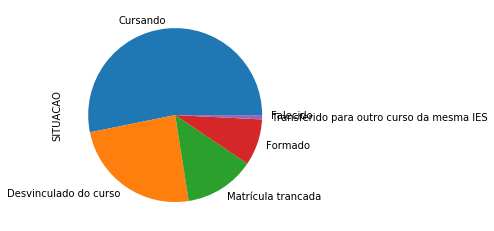

In [19]:
data["SITUACAO"].value_counts().plot.pie()

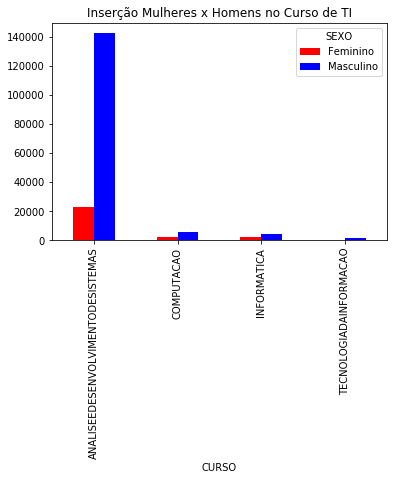

In [20]:
curso_sexo = pd.crosstab(data['CURSO'],data['SEXO'])
curso_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Inserção Mulheres x Homens no Curso de TI')

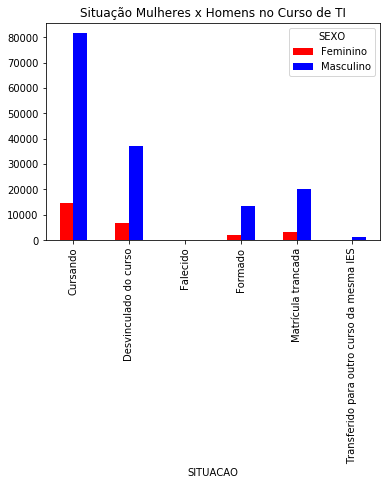

In [21]:
situacao_sexo = pd.crosstab(data['SITUACAO'],data['SEXO'])
situacao_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Situação Mulheres x Homens no Curso de TI')
